In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set()

In [2]:
!ls -la

total 196
drwxrwxr-x  3 quang quang   4096 Jan 12 16:25 .
drwxr-xr-x 17 quang quang   4096 Jan 12 13:16 ..
-rwxrwxr-x  1 quang quang  25936 Jan 12 13:13 imports-85.data
drwxr-xr-x  2 quang quang   4096 Jan 12 13:19 .ipynb_checkpoints
-rwxrwxr-x  1 quang quang 158439 Jan 12 16:25 Predicting_Car_Prices.ipynb


In [3]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 
           'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', header=None, names=headers)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
cars['normalized-losses'].replace('?', np.nan, inplace=True)

In [6]:
cars['normalized-losses'].astype('float64')

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
5        NaN
6      158.0
7        NaN
8      158.0
9        NaN
10     192.0
11     192.0
12     188.0
13     188.0
14       NaN
15       NaN
16       NaN
17       NaN
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
       ...  
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181      NaN
182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189      NaN
190    256.0
191      NaN
192      NaN
193      NaN
194    103.0
195     74.0
196    103.0
197     74.0
198    103.0
199     74.0
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [7]:
def replace_and_cast(col_list):
    for col in col_list:
        cars[col].replace('?', np.nan, inplace=True)
        cars[col] = cars[col].astype('float64')

In [8]:
col_list = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
replace_and_cast(col_list)

In [9]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [11]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
cars.drop('normalized-losses', axis=1, inplace=True)

In [13]:
cars.dropna(inplace=True)

In [14]:
cars.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
symboling            195 non-null int64
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression-ratio    195 non-null float64
horsepower           195 non-null float64
peak-rpm             195 non-

In [16]:
features = ['symboling', 'wheel-base', 'length', 'width' ,'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
           'compression-ratio', 'horsepower', 'peak-rpm' ,'city-mpg' ,'highway-mpg']
def rescale(col_list):
    for col in col_list:
        cars[col] = (cars[col] - cars[col].min()) / (cars[col].max() - cars[col].min())
rescale(features)

In [17]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.558974,0.358496,0.494879,0.477449,0.505128,0.415438,0.252598,0.563846,0.562051,0.199686,0.258279,0.387546,0.343732,0.390553,13248.015385
std,0.246122,0.178777,0.186216,0.182264,0.199731,0.203536,0.156354,0.194190,0.149578,0.253882,0.176961,0.191131,0.177816,0.179719,8056.330093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.230321,0.376119,0.320513,0.350000,0.254849,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.180556,0.236842,7756.500000
50%,0.600000,0.303207,0.479104,0.435897,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000
75%,0.800000,0.460641,0.641045,0.564103,0.654167,0.564585,0.318868,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.500000,16509.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [18]:
def knn_train_test(features, target, data, k_value=5):
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2403)
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    mse = mean_squared_error(prediction, y_test)
    return mse ** (1/2)

rmse_list = []    
for col in features:
    rmse = knn_train_test([col], 'price', cars)
    rmse_list.append(rmse)

rmse_ = pd.Series(rmse_list, index=features)
rmse_.sort_values()

engine-size          2900.835059
city-mpg             3679.834744
highway-mpg          3868.662764
width                3952.990739
curb-weight          4385.125755
horsepower           4700.864666
length               4943.783493
wheel-base           5415.031683
compression-ratio    5512.252159
bore                 6289.816278
height               7313.269140
peak-rpm             7888.900324
symboling            8010.473226
stroke               8111.558427
dtype: float64

In [19]:
k_list = [1, 3, 5, 7, 9]
rmse_list = [(col, []) for col in features]
for i, col in enumerate(features):
    for k in k_list:
        rmse = knn_train_test([col], 'price', cars, k_value=k)
        rmse_list[i][1].append(rmse)

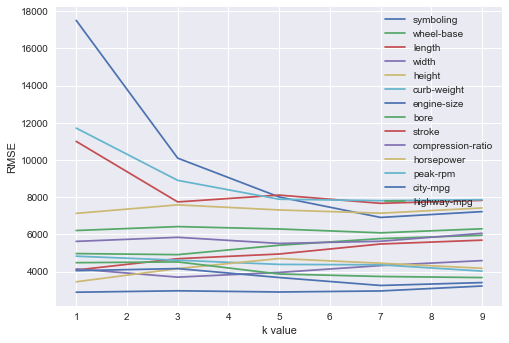

In [20]:
rmse_dict = dict(rmse_list)
for k, v in rmse_dict.items():
    plt.plot(k_list, v, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()

In [21]:
two_best_features = ['engine-size', 'city-mpg']
three_best_features = ['engine-size', 'city-mpg', 'highway-mpg']
four_best_features = ['engine-size', 'city-mpg', 'highway-mpg', 'width']
five_best_features = ['engine-size', 'city-mpg', 'highway-mpg', 'width', 'curb-weight']
models = [two_best_features, three_best_features, four_best_features, five_best_features]

for model in models:
    rmse = knn_train_test(model, 'price', cars)
    print('Training with {} best features: rmse = {}'.format(len(model), rmse))

Training with 2 best features: rmse = 2826.5527320286765
Training with 3 best features: rmse = 3125.3755435408507
Training with 4 best features: rmse = 3558.2455894867685
Training with 5 best features: rmse = 3213.79096687627


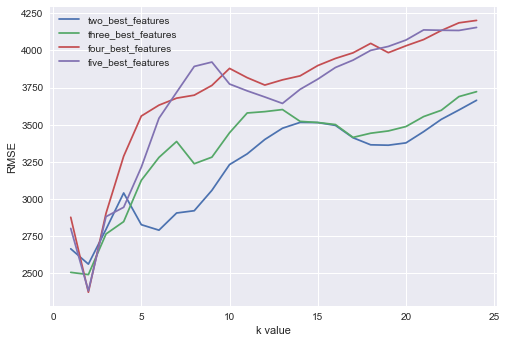

In [22]:
k_rmse = [('two_best_features', []), ('three_best_features', []), ('four_best_features', []), ('five_best_features', [])]
for i, model in enumerate(models):
    for k in range(1, 25):
        rmse = knn_train_test(model, 'price', cars, k)
        k_rmse[i][1].append(rmse)
        
k_rmse = dict(k_rmse)
for k, v in k_rmse.items():
    plt.plot(range(1, len(v)+1), v, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()